In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged = pd.read_csv('/Users/sa2/Desktop/TKH/The-CyberChase/DATA/feb5-12_merged.csv')

In [107]:
merged['Timestamp'] = pd.to_datetime(merged['Timestamp'])
merged['Hour'] = merged['Timestamp'].dt.hour

In [111]:
import geoip2.database
from geopy.geocoders import Nominatim

reader = geoip2.database.Reader('/Users/sa2/Desktop/TKH/The-CyberChase/DATA/GeoLite2-City.mmdb')
# Build location info
locations = []
for ip in merged['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    locations.append(location_str)
# Add to DataFrame
merged['Src Location'] = locations

locations = []
for ip in merged['Dst IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"
    locations.append(location_str)

merged['Dst Location'] = locations


In [112]:
final = merged.drop(columns=[
    'Fwd IAT Total', 'Fwd Header Length', 'Fwd Act Data Pkts', 
    'Bwd Packet/Bulk Avg', 'Fwd Packets/s', 'Fwd IAT Std', 
    'Fwd IAT Max', 'Fwd IAT Min', 'Bwd Header Length', 
    'Average Packet Size', 'Fwd Packet Length Min', 
    'Bwd Packet Length Min', 'Packet Length Mean', 
    'Packet Length Std', 'Packet Length Min', 
    'Fwd IAT Mean', 'Bwd IAT Mean', 'Bwd IAT Std', 
    'Bwd IAT Max', 'Bwd IAT Min', 'Active Max', 
    'Active Std', 'Idle Std', 'Idle Min', 
    'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 
    'Bwd Bytes/Bulk Avg', 'Packet Length Variance', 
    'Subflow Fwd Packets', 'Active Min', 
    'Packet Length Max', 'Bwd IAT Total', 
    'Bwd Packet Length Max', 'Fwd Packet Length Max',
    'Src Port','Dst Port', 'Flow Bytes/s', 'Fwd PSH Flags',
    'Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags',
    'Bwd Packets/s','RST Flag Count','URG Flag Count',
    'CWR Flag Count','ECE Flag Count','Fwd Bytes/Bulk Avg', 
    'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 
    'Bwd Bulk Rate Avg', 'Subflow Bwd Packets',
    'Bwd Init Win Bytes', 'Idle Max', 'Dst IP', 'Flow ID', 'Src IP'
])

In [113]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739215 entries, 0 to 1739214
Data columns (total 34 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Protocol                    int64         
 1   Timestamp                   datetime64[ns]
 2   Flow Duration               int64         
 3   Total Fwd Packet            int64         
 4   Total Bwd packets           int64         
 5   Total Length of Fwd Packet  float64       
 6   Total Length of Bwd Packet  float64       
 7   Fwd Packet Length Mean      float64       
 8   Fwd Packet Length Std       float64       
 9   Bwd Packet Length Mean      float64       
 10  Bwd Packet Length Std       float64       
 11  Flow Packets/s              float64       
 12  Flow IAT Mean               float64       
 13  Flow IAT Std                float64       
 14  Flow IAT Max                float64       
 15  Flow IAT Min                float64       
 16  FIN Flag Count    

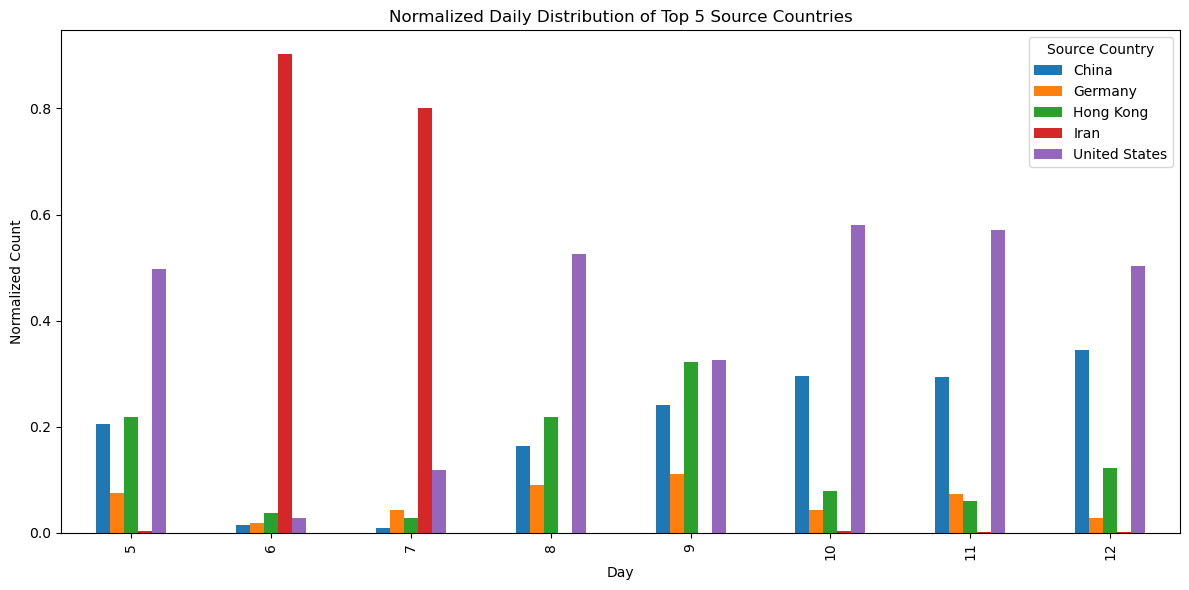

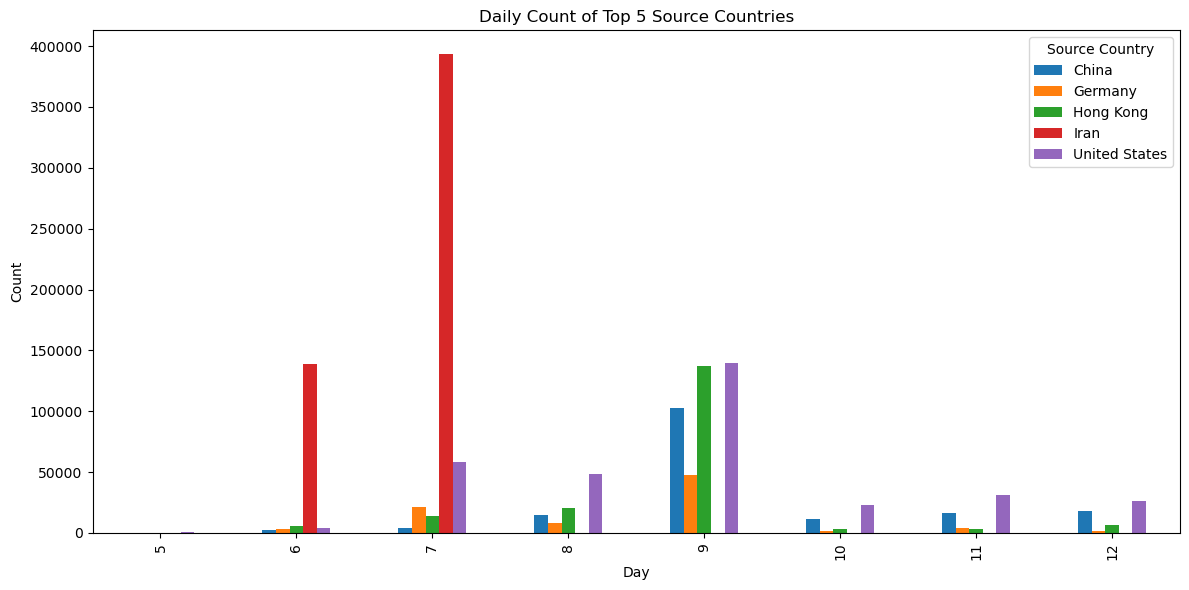

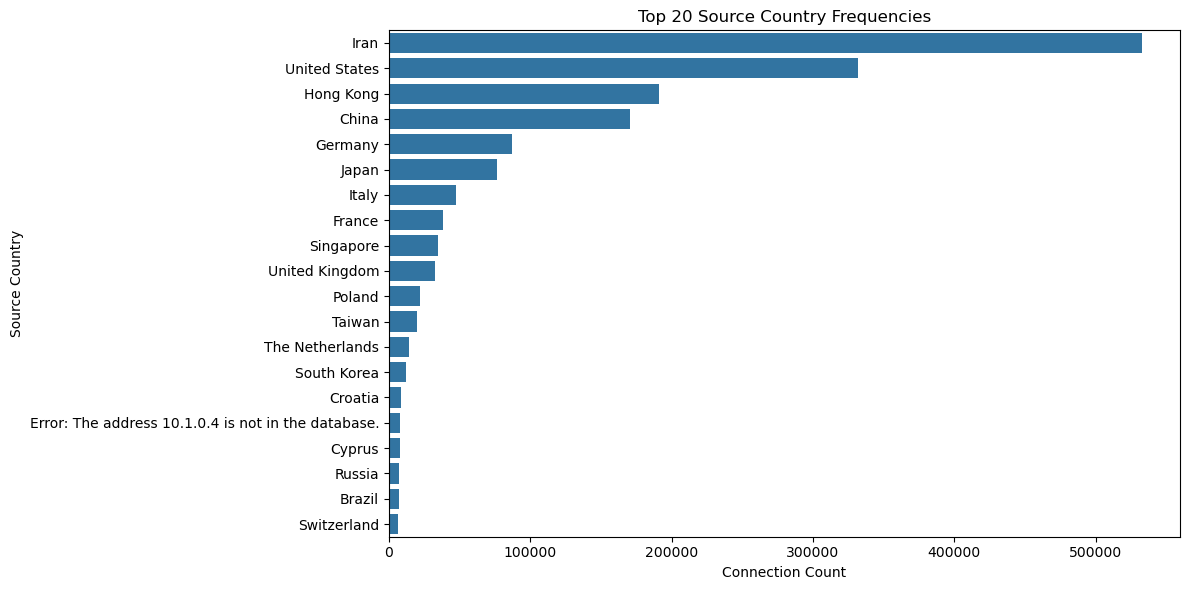

In [128]:
# 5 most frequent source locations
top_src = final['Src Location'].value_counts().nlargest(5).index
filtered_src = final[final['Src Location'].isin(top_src)]

# pivot table: count by day and country
pivot_src = filtered_src.pivot_table(index='day', columns='Src Location', aggfunc='size')
normalized_src = pivot_src.div(pivot_src.sum(axis=1), axis=0)

# plot normalized counts
normalized_src.plot(kind='bar', figsize=(12,6))
plt.title("Normalized Daily Distribution of Top 5 Source Countries")
plt.xlabel("Day")
plt.ylabel("Normalized Count")
plt.legend(title="Source Country", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# raw counts
pivot_src.fillna(0).plot(kind='bar', figsize=(12,6))
plt.title("Daily Count of Top 5 Source Countries")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(title="Source Country", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# barplot of top 20 source countries
src_counts = final['Src Location'].value_counts().nlargest(20).reset_index()
src_counts.columns = ['Src Location', 'Count']
plt.figure(figsize=(12, 6))
sns.barplot(data=src_counts, y='Src Location', x='Count')
plt.title("Top 20 Source Country Frequencies")
plt.xlabel("Count")
plt.ylabel("Source Country")
plt.tight_layout()
plt.show()

In [132]:
print(pivot_src)
print(normalized_src)


Src Location   China  Germany  Hong Kong    Iran  United States
day                                                            
5                236       87        250       4            569
6               2271     2865       5698  139183           4294
7               4443    21079      14306  393250          58327
8              15164     8380      20322      55          48820
9             102663    47367     137567     166         139369
10             11543     1674       3057     134          22704
11             16159     4083       3292     127          31371
12             18212     1538       6434      95          26629
Src Location     China   Germany  Hong Kong      Iran  United States
day                                                                 
5             0.205934  0.075916   0.218150  0.003490       0.496510
6             0.014717  0.018566   0.036925  0.901964       0.027827
7             0.009041  0.042895   0.029112  0.800256       0.118694
8             0

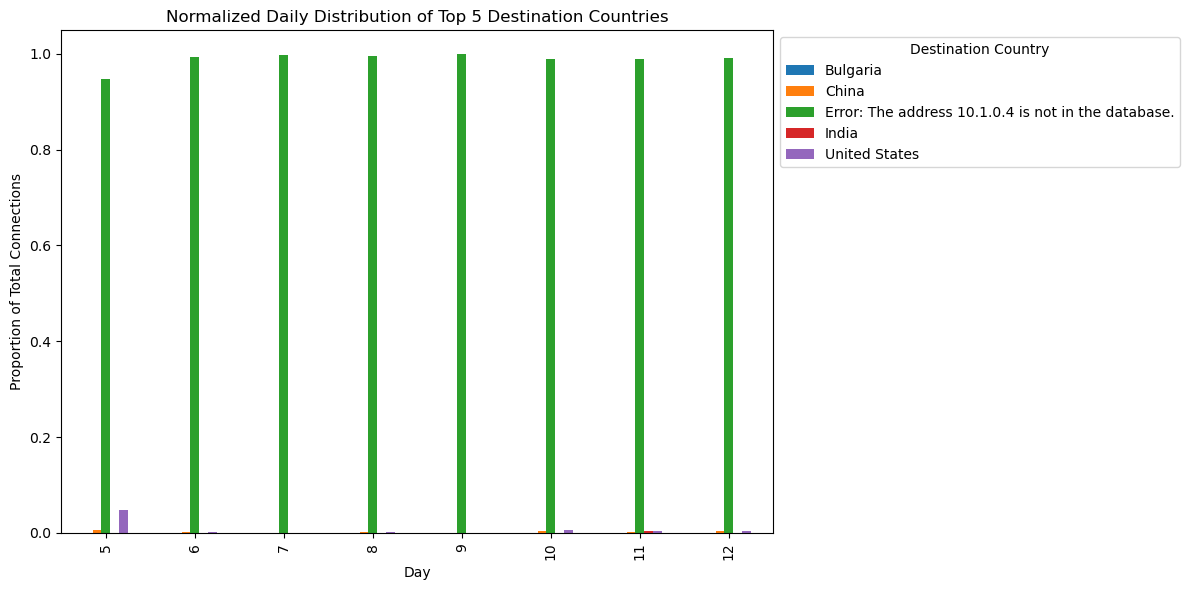

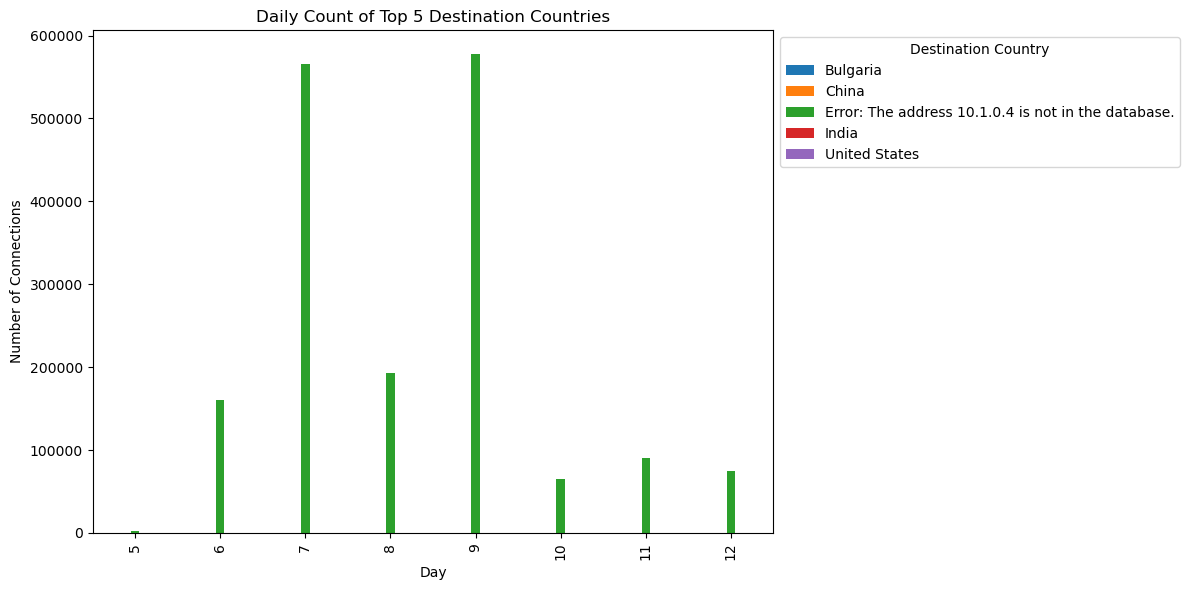

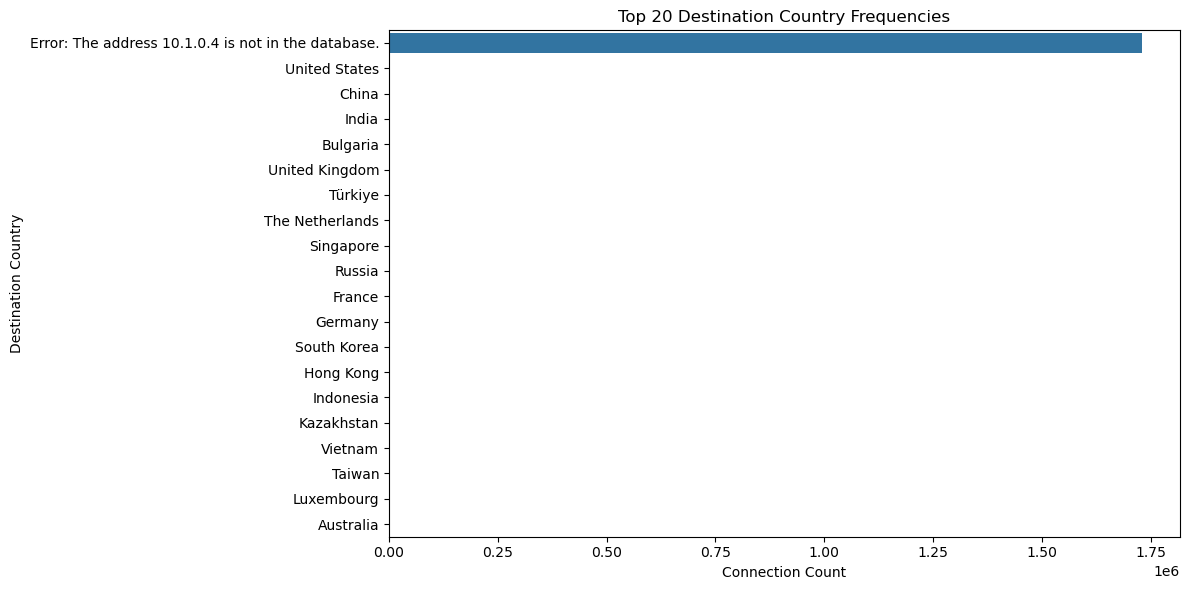

In [133]:
top_dst = final['Dst Location'].value_counts().nlargest(5).index
filtered_dst = final[final['Dst Location'].isin(top_dst)]

pivot_dst = filtered_dst.pivot_table(index='day', columns='Dst Location', aggfunc='size')
normalized_dst = pivot_dst.div(pivot_dst.sum(axis=1), axis=0)

# Plot normalized
normalized_dst.plot(kind='bar', figsize=(12,6))
plt.title("Normalized Daily Distribution of Top 5 Destination Countries")
plt.xlabel("Day")
plt.ylabel("Normalized Count")
plt.legend(title="Destination Country", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Plot raw counts
pivot_dst.fillna(0).plot(kind='bar', figsize=(12,6))
plt.title("Daily Count of Top 5 Destination Countries")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(title="Destination Country", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Barplot of top 20 destination countries
dst_counts = final['Dst Location'].value_counts().nlargest(20).reset_index()
dst_counts.columns = ['Dst Location', 'Count']
plt.figure(figsize=(12, 6))
sns.barplot(data=dst_counts, y='Dst Location', x='Count')
plt.title("Top 20 Destination Country Frequencies")
plt.xlabel("Count")
plt.ylabel("Destination Country")
plt.tight_layout()
plt.show()

In [134]:
print(pivot_dst)
print(normalized_dst)

Dst Location  Bulgaria  China  \
day                             
5                  NaN   12.0   
6                 79.0  494.0   
7                 77.0  464.0   
8                 42.0  379.0   
9                 55.0  181.0   
10                60.0  262.0   
11                62.0  243.0   
12                42.0  260.0   

Dst Location  Error: The address 10.1.0.4 is not in the database.  India  \
day                                                                        
5                                                        1787.0      NaN   
6                                                      160944.0      2.0   
7                                                      565573.0    342.0   
8                                                      193510.0      2.0   
9                                                      577456.0      4.0   
10                                                      65251.0      5.0   
11                                                      90934

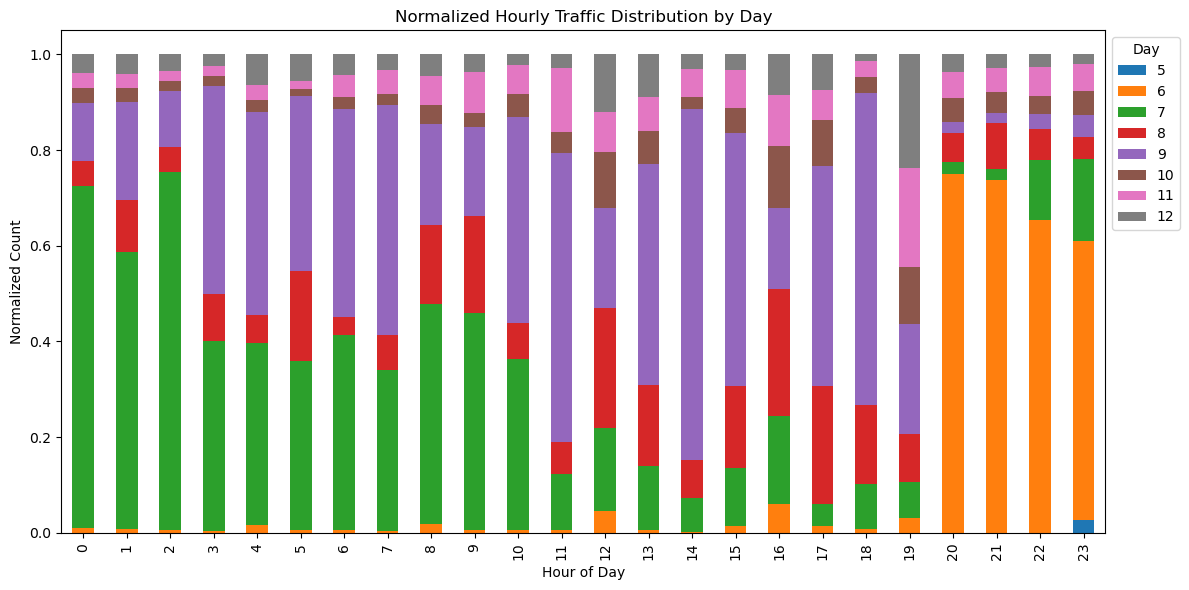

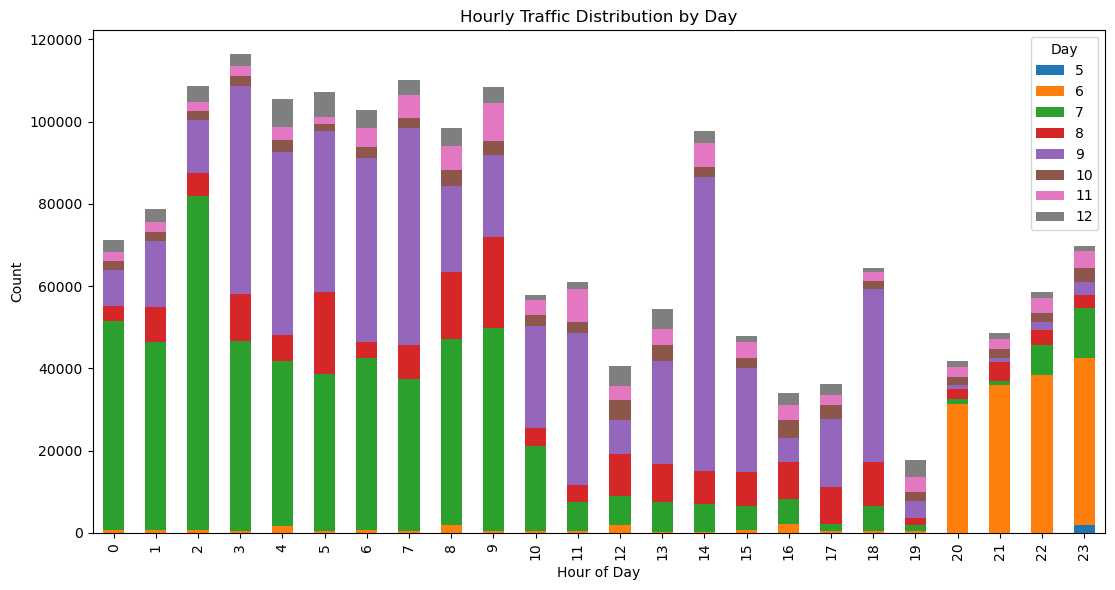

In [138]:
pivot_time = final.pivot_table(index='Hour', columns='day', aggfunc='size')
normalized_time = pivot_time.div(pivot_time.sum(axis=1), axis=0)

# hourly traffic pattern per day
normalized_time.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Normalized Hourly Traffic Distribution by Day")
plt.xlabel("Hour of Day")
plt.ylabel("Normalized Count")
plt.legend(title="Day", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# hourly traffic pattern per day raw counts
pivot_time.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Hourly Traffic Distribution by Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title="Day", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

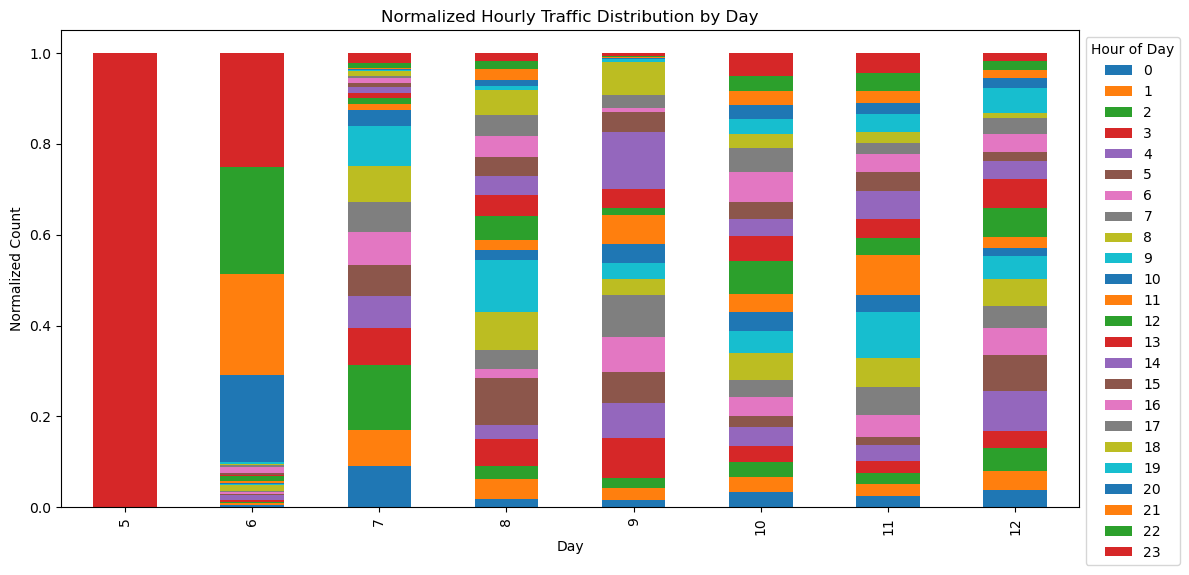

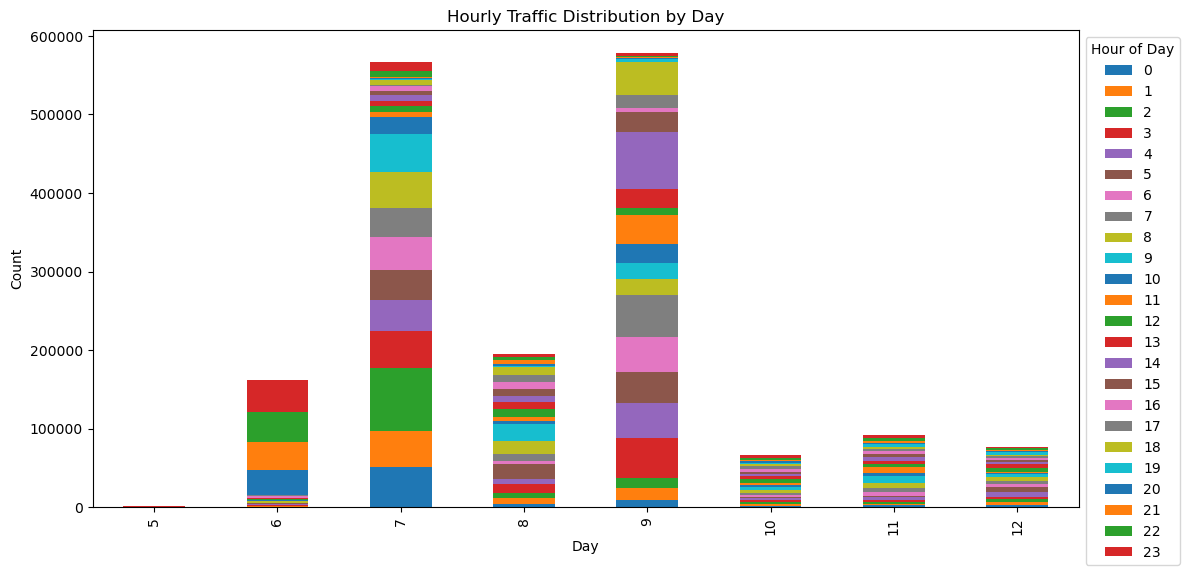

In [140]:
pivot_time = final.pivot_table(index='day', columns='Hour', aggfunc='size')
normalized_time = pivot_time.div(pivot_time.sum(axis=1), axis=0)

# hourly traffic pattern per day
normalized_time.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Normalized Hourly Traffic Distribution by Day")
plt.xlabel("Day")
plt.ylabel("Normalized Count")
plt.legend(title="Hour of Day", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# hourly traffic pattern per day raw counts
pivot_time.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Hourly Traffic Distribution by Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(title="Hour of Day", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [137]:
print(pivot_time)
print(normalized_time)

day       5        6        7        8        9       10      11      12
Hour                                                                    
0        NaN    688.0  50940.0   3664.0   8669.0  2184.0  2220.0  2816.0
1        NaN    657.0  45656.0   8534.0  16062.0  2251.0  2414.0  3220.0
2        NaN    651.0  81279.0   5652.0  12802.0  2148.0  2295.0  3889.0
3        NaN    486.0  46152.0  11361.0  50742.0  2312.0  2393.0  2938.0
4        NaN   1743.0  40159.0   6203.0  44614.0  2763.0  3255.0  6744.0
5        NaN    554.0  38063.0  19955.0  39266.0  1659.0  1708.0  6027.0
6        NaN    610.0  41982.0   3906.0  44601.0  2725.0  4552.0  4541.0
7        NaN    558.0  36888.0   8148.0  52824.0  2562.0  5589.0  3619.0
8        NaN   1825.0  45262.0  16350.0  20806.0  3957.0  5891.0  4478.0
9        NaN    587.0  49346.0  22032.0  19998.0  3219.0  9361.0  3987.0
10       NaN    418.0  20657.0   4369.0  24906.0  2715.0  3533.0  1308.0
11       NaN    417.0   7065.0   4171.0  36894.0  2